In [1]:
import scipy.stats as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

**Degrees of Freedom (DoF)** are the number of independent values, that a statistical analysis can estimate  
    
$$ {DoF} = Sample Size - Number\ of\ Parameters $$  
  
**Degrees of Freedom (DoF)** are the number of observation in a sample that are free to vary while estimating statistical parameters. DoF determine the shape of distribuations

**Распределение Стьюдента**

Случайная величина имеет t-распределение, если 

$$ t_v = \frac{Z}{\sqrt{\frac{V}{v}}}, $$
  где:  
$Z$ - стандартно распределенная нормальная величина  
$V$ - СВ с распределением Хи квадрат  
$v$ - Число DoF  

**Распределение Хи-квадрат** с *k* степенями свободы - это распределение суммы квадратов **k** независимых стандартных нормальных величин  
  
**Критерий Хи квадрат Пирсона**   
Критерий χ2 (хи квадрат) проверяет значимость расхождения эмпирических (наблюдаемых) и теоретических (ожидаемых) частот по категориям. 

$H_0$: Фактические данные не противоречат ожидаемым.  
$H_1$: Фактические данные противоречат ожидаемым. 
  
  
В общем случае количество категорий, по которым измеряются частоты, может быть большим, поэтому вероятность того, что отдельно взятое наблюдение попадет в ту или иную категорию, довольно мала. Раз так, то, распределение такой случайной величины будет подчинятся закону редких событий, известному под названием **закон Пуассона**.  
  
В законе Пуассона, как известно, значение математического ожидания и дисперсии совпадают (параметр λ). Значит, ожидаемая частота для некоторой категории номинальной переменной $E_i$ будет являться одновременно и ее дисперсией.  
  
Далее, закон *Пуассона при большом количестве наблюдений стремится к нормальному*. Соединяя эти два факта, получаем, что, если гипотеза о согласии наблюдаемых и ожидаемых частот верна, то, при большом количестве наблюдений, выражение:  
  
$$\frac{(O_i - E_i)}{\sqrt{E_i}}$$  
  
имеет стандартное нормальное распределение.  
  
Важно помнить, что нормальность будет проявляться только при достаточно больших частотах. В статистике принято считать, что общее количество наблюдений (сумма частот) должна быть не менее 50 и ожидаемая частота в каждой группе должна быть не менее 5.  
  
У стандартного нормального распределения почти все значение находятся в пределах ±3 (правило трех сигм). Таким образом, мы получили относительную разность в частотах для одной группы. Нам нужна обобщающая мера. Просто сложить все отклонения нельзя – получим 0. Пирсон предложил сложить квадраты этих отклонений.  
  
$$X^2 = \sum\frac{(O_i - E_i)^2}{E_i}$$  

Как нетрудно заметить, величина хи-квадрат зависит от количества слагаемых. Чем больше слагаемых, тем больше ожидается значение статистики, ведь каждое слагаемое вносит свой вклад в общую сумму. Следовательно, для каждого количества **независимых слагаемых**, будет собственное распределение.  
  
По этому поводу Фишер ввел в статистику новое понятие – степень свободы (degrees of freedom), которое и представляет собой количество независимых слагаемых в сумме. 

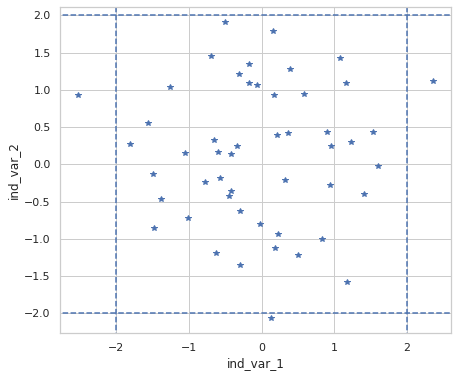

In [9]:
ind_var_1 = np.random.randn(50) 
ind_var_2 = np.random.randn(50) 

fig = plt.figure(figsize=(7,6))
plt.plot(ind_var_1, ind_var_2, "*")
plt.axhline(-2, xmin=-1, xmax=1, linestyle= "--")
plt.axhline(2, xmin=-1, xmax=1, linestyle= "--")
plt.axvline(2, ymin=-1, ymax=1, linestyle= "--")
plt.axvline(-2, ymin=-1, ymax=1, linestyle= "--")
plt.xlabel('ind_var_1')
plt.ylabel('ind_var_2')
plt.show()

При этом квадрат расстояния от нуля до каждой точки это и будет случайная величина, имеющая распределение Хи-квадрат с двумя степенями свободы. Вспомнив теорему Пифагора, легко убедиться, что данное расстояние и есть сумма квадратов значений обеих величин

А теперь представим, что мы 50 раз подбрасываем монетку по 100 раз. Как тогда будет выглядеть распределение величин?

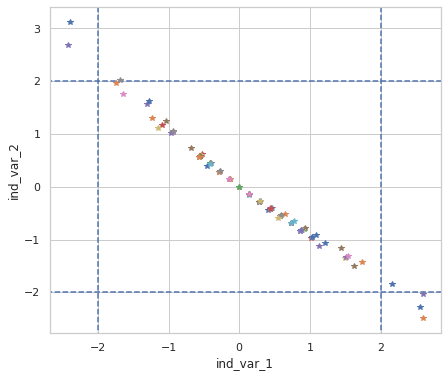

In [26]:
fig = plt.figure(figsize=(7,6))
plt.axhline(-2, xmin=-1, xmax=1, linestyle="--")
plt.axhline(2, xmin=-1, xmax=1, linestyle="--")
plt.axvline(2, ymin=-1, ymax=1, linestyle="--")
plt.axvline(-2, ymin=-1, ymax=1, linestyle="--")

for i in range(100):
    E_1 = sc.bernoulli.rvs(0.5, loc=0, size=100)
    O_1 = sc.bernoulli.rvs(0.5, loc=0, size=100)
    E_2 = 1 - E_1
    O_2 = 1 - O_1

    stat_1 = (O_1.sum()-E_1.sum())/np.sqrt(E_1.sum())
    stat_2 = (O_2.sum()-E_2.sum())/np.sqrt(E_2.sum())

    plt.plot(stat_1, stat_2, "*")

plt.xlabel('ind_var_1')
plt.ylabel('ind_var_2')
plt.show()

Две категории линейно зависимы, так как зная общее число бросков и число решек, мы всегда можем точно определить выпавшее число орлов и наоборот, поэтому мы не можем сказать, что два наших слагаемых — это две независимые случайные величины.  
Следовательно, мы не можем использовать Хи_квадрат распределение с 2-мя степенями свободы, нужно использовать лишь с 1-ой.

In [22]:
O_2

-40